In [5]:
import seaborn as sns
sns.set_theme()

In [165]:
import json

clients = 750

error_counts = {}
dead = []
aggregate_intervals = []

with open('/users/fchensan/proxy-offload/client-server-host/logs-750/iperf3-' + str(30000) + '.json') as user_file:
    file_contents = user_file.read()
    parsed_json = json.loads(file_contents)
    first_timesecs = parsed_json['start']['timestamp']['timesecs']
    for interval in parsed_json['intervals']:
      aggregate_intervals += [interval['sum']]

count = 0
for i in range(30001,30000+clients-1):
  with open('/users/fchensan/proxy-offload/client-server-host/logs-750/iperf3-' + str(i) + '.json') as user_file:
    file_contents = user_file.read()
    parsed_json = json.loads(file_contents)
    time_delta = parsed_json['start']['timestamp']['timesecs'] - first_timesecs
    count += 1
    if "error" in parsed_json:
        if parsed_json['error'] in error_counts:
            error_counts[parsed_json['error']] += 1
        else:
            error_counts[parsed_json['error']] = 1
    for interval in parsed_json['intervals']:
        for i in range(len(aggregate_intervals)-1,-1,-1):
            if aggregate_intervals[i]['start'] < interval['sum']['start']-time_delta:
                aggregate_intervals[i]['bits_per_second'] += interval['sum']['bits_per_second']
                break
        
print("Number of errors:")
for msg in error_counts:
    print(f"{msg}: {error_counts[msg]}")
    
print(f"Processes counted: {count}")

Number of errors:
Processes counted: 748


In [163]:
get_bytes_intervals(get_parsed_json_for_stream('/users/fchensan/proxy-offload/client-server-host/logs-750/iperf3-' + str(30333) + '.json'))

[14086144,
 0,
 2691072,
 12747992,
 0,
 4029224,
 12834096,
 0,
 3943120,
 12732744,
 0,
 0,
 16764088,
 0,
 0,
 4057600,
 12739600,
 0,
 4037616,
 12814120,
 0,
 3963096,
 12622088,
 0,
 3573960,
 10512952,
 323600,
 672904,
 11812560,
 517632,
 880720,
 2983968,
 10488784,
 798768,
 2917648,
 11779016,
 1409888,
 1385104,
 12774560,
 526600,
 577864,
 12936880,
 855808,
 833328,
 12260912,
 1118608,
 1235048,
 1562968,
 12416920,
 654080,
 843600,
 14960736,
 1750288,
 1709896,
 15030928,
 4065592,
 5236784,
 17273192,
 1441792,
 4311720]

In [141]:
def get_parsed_json_for_stream(filepath):
    with open(filepath) as user_file:
        file_contents = user_file.read()
        parsed_json = json.loads(file_contents)
        return parsed_json

In [152]:
def get_bytes_intervals(parsed_json):
    bytes_collected = []
    for interval in parsed_json['intervals']:
        bytes_collected += [interval['sum']['bytes']]
    return bytes_collected

In [2]:
import pandas as pd

In [21]:
path = "~/proxy-offload/client-server-host/600-conns"
df = pd.read_csv(path+"/monitor.log", parse_dates=["datetime"])
df["Connections"] = df["TCP Established"] / 2
df.head(50)

,datetime,TX p0 pps,TX p0 kB/s,TX p1 pps,TX p0 kB/s.1,RX p0 pps,RX p0 kB/s,RX p1 pps,RX p1 kB/s,TCP Established,Unnamed: 10,Connections
0,2023-03-28 08:50:33,264344,118272,250833,117936,0,0,21,0,4402,NaN,2201.0
1,2023-03-28 08:50:54,303173,138936,286530,138520,2,0,21,0,9588,NaN,4794.0
2,2023-03-28 08:51:14,302515,138920,286364,138512,2,0,22,0,14774,NaN,7387.0
3,2023-03-28 08:51:34,491026,228976,466586,228376,1,0,21,0,19962,NaN,9981.0
4,2023-03-28 08:51:54,586191,277312,556022,276536,1,0,20,0,25146,NaN,12573.0
5,2023-03-28 08:52:14,634944,278744,655752,328096,1,0,21,0,30264,NaN,15132.0
6,2023-03-28 08:52:34,863343,343992,1004308,509536,0,0,21,0,35527,NaN,17763.5
7,2023-03-28 08:52:54,912415,415640,947801,480960,1,0,20,0,40624,NaN,20312.0
8,2023-03-28 08:53:14,1005194,417776,1115716,567400,1,0,21,0,45798,NaN,22899.0
9,2023-03-28 08:53:34,1211017,464744,1183275,561672,0,0,21,0,51090,NaN,25545.0


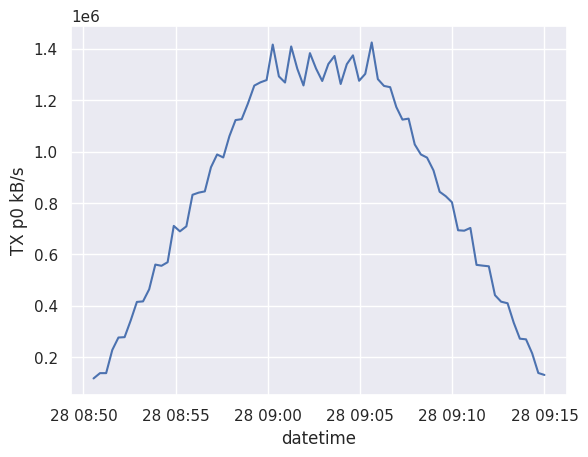

In [22]:
g = sns.lineplot(data=df, x="datetime", y="TX p0 kB/s")
# g.set(ylim=(0,150000))

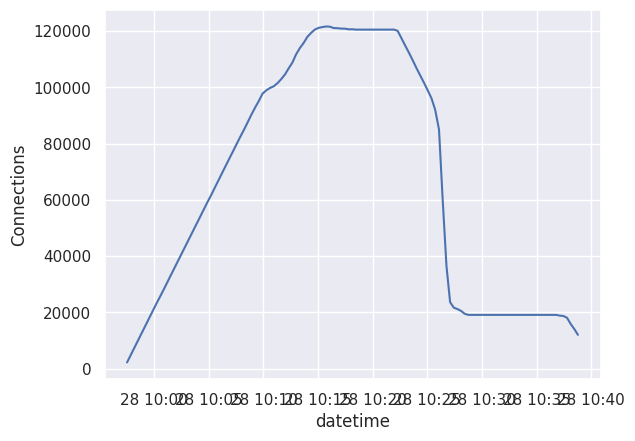

In [17]:
g = sns.lineplot(data=df, x="datetime", y="Connections")

In [18]:
def parse_nginx_log_error(filepath):
    errors = []
    with open(filepath) as file:
        for line in file:
            if "Broken pipe" in line or "Connection reset" in line:
                errors += [[line[:19], 1]]
    return errors

In [20]:
errors = parse_nginx_log_error(path+"/nginx-error.log")

FileNotFoundError: [Errno 2] No such file or directory: '~/proxy-offload/client-server-host/1000-conns/nginx-error.log'

In [290]:
nginx_error = pd.DataFrame(errors)
nginx_error[0] = pd.to_datetime(nginx_error[0])

In [291]:
nginx_error['cum_error'] = nginx_error[1].cumsum()

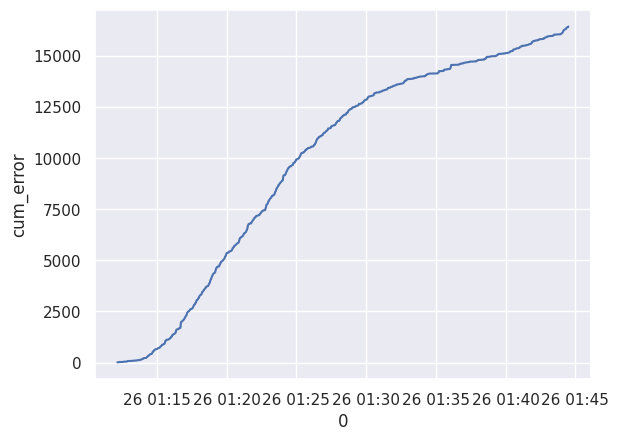

In [292]:
g = sns.lineplot(data=nginx_error, x=0, y="cum_error")